In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

## Importing data

In [2]:
movies=pd.read_csv('dados/movies.csv')
movies=movies.set_index('movieId')
movies.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings=pd.read_csv('dados/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Adding movies rating informations 

In [4]:
movies['n_rates']=ratings['movieId'].value_counts()

In [5]:
movies['ratings_mean']=round((ratings.groupby('movieId').mean()['rating']),2)

In [6]:
movies.head()

,title,genres,n_rates,ratings_mean
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.92
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.43
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.26
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.36
5,Father of the Bride Part II (1995),Comedy,49.0,3.07


## Creating movies groups - KMeans 

#### Converting categorical variable into dummy variables

In [7]:
genres_dummies=movies.genres.str.get_dummies()
genres_dummies.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Standardization 

In [67]:
scaler=StandardScaler()
genres_scaled=scaler.fit_transform(genres_dummies)
genres_scaled=pd.DataFrame(genres_scaled,columns=genres_dummies.columns)

#### Elbow method for cluster analysis

In [68]:
def kmeans(n_cluster,data):
    modelo=KMeans(n_clusters=n_cluster)
    modelo.fit(data)
    return[n_cluster,modelo.inertia_]

In [69]:
elbow_clusters_movies=[kmeans(n_cluster,genres_scaled) for n_cluster in range(1,40)]

In [70]:
error_graph_movies=pd.DataFrame(elbow_clusters_movies,columns=['gruop','inertia'])

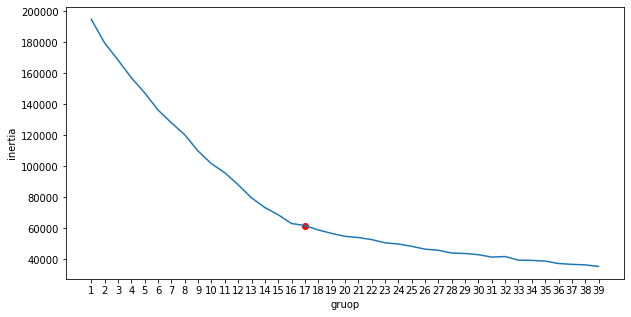

In [71]:
plt.figure(figsize=(10,5))
plt.xticks(range(1, 40))
sns.lineplot(x=error_graph_movies.gruop, y=error_graph_movies.inertia, data=error_graph_movies)
plt.scatter(x=error_graph_movies.gruop[16], y=error_graph_movies.inertia[16], color='r')

#### Modeling for n_cluster = 17 

In [72]:
model_movies=KMeans(n_clusters=17)
model_movies.fit(genres_scaled)
movies_gruops=pd.DataFrame(model_movies.cluster_centers_,columns=genres_dummies.columns)
movies_gruops

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.165809,1.049870,1.454090,3.697524,0.374798,-0.317948,-0.217489,-0.585669,0.810552,-0.094926,-0.315465,-0.128397,-0.188419,-0.178754,-0.306787,-0.024886,-0.481848,-0.182832,-0.132065
1,-0.059180,-0.390736,-0.257907,-0.258679,-0.270451,-0.770034,0.121491,-0.217489,0.983337,-0.209264,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,0.096479,-0.202020,-0.132065
2,-0.059180,-0.198323,-0.308750,-0.258679,-0.270451,-0.335929,-0.182228,-0.217489,-0.567787,0.051764,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.350675,-0.334435,0.618587,-0.202020,-0.132065
3,-0.059180,-0.411608,-0.244998,-0.258679,-0.270451,0.462408,-0.245420,-0.217489,0.317877,-0.084134,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,2.259206,-0.329007,-0.402562,-0.202020,-0.132065
4,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
5,-0.059180,0.404605,0.035718,-0.211943,-0.259210,-0.466192,-0.297025,-0.190207,0.751893,-0.253033,-0.094926,-0.305776,-0.128397,-0.188419,-0.213866,-0.052283,-0.240255,-0.197773,4.950012,-0.132065
6,-0.059180,0.128485,0.249380,-0.183231,-0.125281,-0.303544,-0.189027,-0.188127,-0.189021,-0.159926,-0.094926,-0.192025,-0.128397,0.146687,-0.172239,-0.113141,-0.192533,-0.244737,0.112129,7.572010
7,-0.059180,0.856367,0.724011,-0.258679,-0.262864,-0.387501,-0.269869,-0.217489,-0.411903,0.078807,-0.094926,-0.334055,-0.128397,-0.188419,-0.241860,-0.246324,2.990120,0.257615,-0.202020,-0.132065
8,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
9,-0.059180,-0.330797,-0.264233,-0.258679,-0.270451,1.262425,-0.129182,-0.217489,-0.316687,-0.150352,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.459691,-0.202020,-0.132065


## Creating users groups - KMeans 

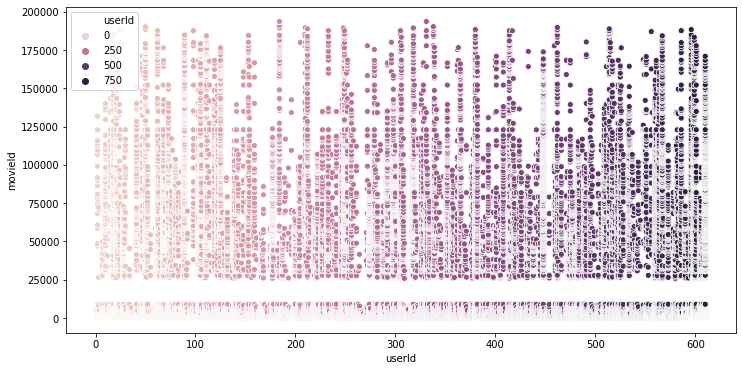

In [73]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=ratings.userId,y=ratings.movieId, data=ratings, hue=ratings.userId)

#### Converting categorical variable into dummy variables

In [74]:
users=ratings.copy()
users.set_index('userId')
users_index=users['userId'].unique()

In [75]:
users_group=list()  
n_users=len(users['userId'].unique())

for i in range(1,n_users+1):
    user_movies=[x for x in users.query('userId==%d' %i)['movieId']]
    user_dummies=movies.loc[user_movies].genres.str.get_dummies()
    dummies_sum=user_dummies.sum(axis = 0, skipna = True)
    dummies_sum.T
    users_group.append(dummies_sum)

In [76]:
n=users['userId'].unique()
users_genres_count=pd.DataFrame(users_group)
users_genres_count['userId']=users_index

In [77]:
users_genres_count.fillna(0,inplace=True)

In [78]:
users_genres_count.set_index('userId')

,Action,Adventure,Animation,Children,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Documentary,IMAX,(no genres listed)
userId,,,,,,,,,,,,,,,,,,,,
1,90.0,85.0,29.0,42.0,83.0,45.0,68.0,47.0,1.0,17.0,22.0,18.0,26.0,40.0,55.0,22.0,7.0,0.0,0.0,0.0
2,11.0,3.0,0.0,0.0,7.0,10.0,17.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,10.0,1.0,1.0,3.0,4.0,0.0
3,14.0,11.0,4.0,5.0,9.0,2.0,16.0,4.0,0.0,8.0,1.0,1.0,5.0,15.0,7.0,5.0,0.0,0.0,0.0,0.0
4,25.0,29.0,6.0,10.0,104.0,27.0,120.0,19.0,4.0,4.0,16.0,23.0,58.0,12.0,38.0,7.0,10.0,2.0,1.0,0.0
5,9.0,8.0,6.0,9.0,15.0,12.0,25.0,7.0,0.0,1.0,5.0,1.0,11.0,2.0,9.0,3.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,151.0,147.0,42.0,49.0,421.0,133.0,698.0,97.0,8.0,52.0,44.0,91.0,355.0,79.0,199.0,65.0,17.0,5.0,16.0,0.0
607,72.0,45.0,6.0,19.0,55.0,27.0,82.0,21.0,0.0,35.0,5.0,17.0,29.0,36.0,61.0,6.0,2.0,0.0,1.0,0.0
608,277.0,181.0,55.0,88.0,355.0,146.0,280.0,111.0,4.0,97.0,33.0,69.0,106.0,167.0,259.0,19.0,11.0,6.0,12.0,0.0


#### Standardization 

In [79]:
scaler=StandardScaler()
users_scaled=scaler.fit_transform(users_genres_count)
users_scaled=pd.DataFrame(users_scaled,columns=users_genres_count.columns)

#### Elbow method for cluster analysis

In [80]:
elbow_clusters_users=[kmeans(n_cluster,users_scaled) for n_cluster in range(1,40)]

In [81]:
error_graph_users=pd.DataFrame(elbow_clusters_users,columns=['gruop','inertia'])

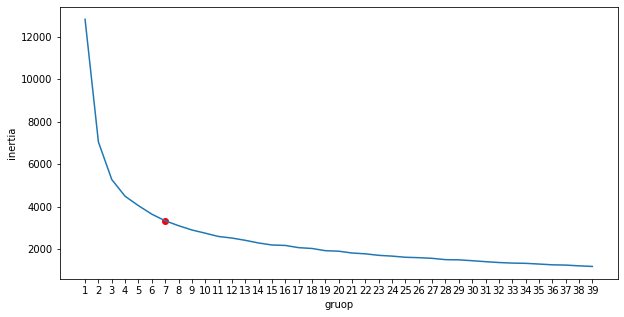

In [82]:
plt.figure(figsize=(10,5))
plt.xticks(range(1, 40))
sns.lineplot(x=error_graph_users.gruop, y=error_graph_users.inertia, data=error_graph_users)
plt.scatter(x=error_graph_users.gruop[6], y=error_graph_users.inertia[6], color='r')

#### Modeling for n_cluster = 7 

In [83]:
model_users=KMeans(n_clusters=7)
model_users.fit(users_scaled)
users_gruops=pd.DataFrame(model_users.cluster_centers_,columns=users_genres_count.columns)
users_gruops

,Action,Adventure,Animation,Children,Comedy,Crime,Drama,Fantasy,Film-Noir,Horror,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Documentary,IMAX,(no genres listed),userId
0,-0.368919,-0.405828,-0.353596,-0.359157,-0.347726,-0.356367,-0.339133,-0.384452,-0.269170,-0.267246,...,-0.360066,-0.330705,-0.385218,-0.354674,-0.349213,-0.320430,-0.203608,-0.317956,-0.161858,0.866437
1,4.777187,4.448267,3.924112,3.835243,3.769006,4.100254,3.084881,4.207200,1.378011,5.016350,...,4.046750,2.534307,4.563021,4.681565,2.992486,3.986436,2.578129,4.476464,1.294017,0.135583
2,-0.368462,-0.404415,-0.356814,-0.365315,-0.370665,-0.373217,-0.338449,-0.397264,-0.249364,-0.315251,...,-0.385826,-0.336358,-0.379009,-0.364965,-0.328767,-0.296059,-0.183606,-0.323405,-0.140525,-0.867770
3,1.986408,2.094544,1.568393,1.774943,2.047112,2.120737,2.038854,2.120887,1.686117,1.734511,...,2.306464,2.074453,1.981954,2.156073,1.977728,1.837735,0.635918,1.137664,-0.181956,0.089915
4,6.123715,5.997442,5.487106,5.508621,7.738959,7.635403,9.388310,5.965528,7.956516,4.852113,...,7.049874,8.700828,5.920947,6.857773,8.111776,7.859733,8.914800,2.754895,4.541159,1.079930
5,1.192873,1.727302,2.556643,2.017015,1.189572,0.695546,0.703141,1.724854,-0.004028,0.476314,...,0.816517,0.919826,1.336458,0.698626,0.561726,0.399805,0.688965,2.497120,3.568753,0.275759
6,0.437009,0.522620,0.334620,0.416013,0.406126,0.478775,0.402352,0.465019,0.432171,0.272432,...,0.466357,0.395447,0.504792,0.417868,0.497833,0.336045,0.146288,0.339255,-0.104949,-0.186970


# Recommendation 

## Recommendation for  popularity

In [14]:
def recommendatio_popularity(min_rates):
    return movies.query('n_rates>=%d'%min_rates).sort_values('ratings_mean', ascending=False).head(10)

In [15]:
recommendatio_popularity(200)

,title,genres,n_rates,ratings_mean
movieId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.27
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204.0,4.24
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.23
527,Schindler's List (1993),Drama|War,220.0,4.22
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.22
1198,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.21
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.20
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.19


## Recommendations by movies group

In [41]:
def find_movie(title):
    try:
        return movies.loc[movies[movies['title'].str.contains(title)].index]
    except:
        return print('Not Found')

In [42]:
def predict_group(movie_index):
    return model_movies.predict([genres_scaled.loc[movie_index]])

In [43]:
def recommendations_group(movie_index,sample=10):
    x=predict_group(movie_index)
    return movies[model_movies.labels_==x].head(sample)

In [44]:
find_movie('Toy')

,title,genres,n_rates,ratings_mean
movieId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.92
2017,Babes in Toyland (1961),Children|Fantasy|Musical,5.0,3.10
2253,Toys (1992),Comedy|Fantasy,20.0,2.38
3086,Babes in Toyland (1934),Children|Comedy|Fantasy|Musical,1.0,5.00
3114,Toy Story 2 (1999),Adventure|Animation|Children|Comedy|Fantasy,97.0,3.86
4929,"Toy, The (1982)",Comedy,4.0,2.38
5843,Toy Soldiers (1991),Action|Drama,4.0,2.50
78499,Toy Story 3 (2010),Adventure|Animation|Children|Comedy|Fantasy|IMAX,55.0,4.11


In [45]:
predict_group(2017)

array([13])

In [46]:
recommendations_group(2017)

,title,genres,n_rates,ratings_mean
movieId,,,,
22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,36.0,3.22
29,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi,38.0,4.01
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177.0,3.98
47,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.98
50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,204.0,4.24
103,Unforgettable (1996),Mystery|Sci-Fi|Thriller,3.0,3.00
113,Before and After (1996),Drama|Mystery,3.0,3.33
123,Chungking Express (Chung Hing sam lam) (1994),Drama|Mystery|Romance,4.0,4.38
159,Clockers (1995),Crime|Drama|Mystery,14.0,2.89


## Recommendations by similar users

In [22]:
def user_rates(user):
    return ratings.query('userId==%d' % user)[['movieId','rating']].set_index('movieId')

In [23]:
def dist_user(user_id1, user_id2, minimum=5):
    rates1=user_rates(user_id1)
    rates2=user_rates(user_id2)
    diference=rates1.join(rates2, lsuffix='_left', rsuffix='_right').dropna()

    if(len(diference)<minimum):
        return None
    
    distance=np.linalg.norm(diference['rating_left']-diference['rating_right'])
    return [user_id1, user_id2,distance]

In [24]:
def dist_group(user, users_to_compare=None):
    distance=list()
    all_users=ratings['userId'].unique()
   
    if users_to_compare:
        all_users=all_users[:users_to_compare]
   
    for user_id in all_users:
        info=dist_user(user,user_id)
        distance.append(info) 
    distance=list(filter(None,distance))
    distance = pd.DataFrame(distance,columns=['user','other','distance'])
    return distance

In [25]:
def nearest(user, users_to_compare=None):
    distance=dist_group(user,users_to_compare)
    distance=distance.sort_values('distance')
    distance=distance.set_index('other').drop(user, errors='ignore')
    return distance

In [26]:
def group_recommendation(user, k=10, users_to_compare=None):
    next_user= nearest(user,users_to_compare)
    similar= next_user.head(k)
    similar_users= similar.index
    
    similar_rates= ratings.set_index('userId').loc[similar_users]
    recommendation= similar_rates.groupby('movieId').mean()[['rating']]
    appearances= similar_rates.groupby('movieId').count()[['rating']]
    
    min_filter= k/2
    
    recommendation= recommendation.join(appearances, lsuffix='_1',rsuffix= '_appearances')
    
    recommendation= recommendation.query('rating_appearances>= %.2f' %min_filter)
    
    recommendation= recommendation.sort_values('rating_1', ascending=False)
    
    return recommendation.join(movies).head()


In [27]:
group_recommendation(1,users_to_compare=50)

,rating_1,rating_appearances,title,genres,n_rates,ratings_mean
movieId,,,,,,
110,4.2,5,Braveheart (1995),Action|Drama|War,237.0,4.03
318,4.2,5,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.43
592,3.4,5,Batman (1989),Action|Crime|Thriller,189.0,3.43
